In [4]:
import json
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

import warnings
import re
warnings.filterwarnings("ignore")

In [6]:
class Config:
    image_dir = 'vqa/train2014/train2014'
    val_image_dir = "vqa/val2014/val2014"
    train_annotation = "vqa/v2_Annotations_Train_mscoco/v2_mscoco_train2014_annotations.json"
    train_questions = "vqa/v2_Questions_Train_mscoco/v2_OpenEnded_mscoco_train2014_questions.json"

    val_questions = "vqa/v2_Questions_Val_mscoco/v2_OpenEnded_mscoco_val2014_questions.json"
    val_annotaions = "vqa/v2_Annotations_Val_mscoco/v2_mscoco_val2014_annotations.json"

In [22]:
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}


def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re
contractions, contractions_re = _get_contractions(contraction_dict)

def replace_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)

def modify_dataframe(df):
    df.rename(columns={"image_id_x":"image_id"}, inplace=True)
    df.drop(columns="image_id_y", axis=1, inplace=True)
    return df

def load_json_files(config):
    """
    Load the json files
    """
    train_questions = json.load(open(config.train_questions))['questions']
    train_annotations = json.load(open(config.train_annotation))['annotations']
    val_questions = json.load(open(config.val_questions))['questions']
    val_annotations = json.load(open(config.val_annotaions))['annotations']
    
    questions_df = pd.DataFrame(train_questions)
    annotations_df = pd.DataFrame(train_annotations)

    questions_df_val = pd.DataFrame(val_questions)
    annotations_df_val = pd.DataFrame(val_annotations)

    df_train = pd.merge(questions_df, annotations_df, on='question_id')
    df_val = pd.merge(questions_df_val, annotations_df_val, on='question_id')
    
    df_train = modify_dataframe(df_train)
    df_val = modify_dataframe(df_val)
    df_val.shape
    
    # df_train = df_train[df_train.answer_type == 'yes/no']
    # df_val = df_val[df_val.answer_type == 'yes/no']
    df_val, _ = train_test_split(df_val, train_size=10000)

    # assert df_train.shape == (166882, 7) and df_val.shape == (10000, 7), print("Dataframe shapes are correct")

    df_train = df_train[df_train['multiple_choice_answer'].isin(['yes', 'no'])]
    df_val = df_val[df_val['multiple_choice_answer'].isin(['yes', 'no'])]

    return df_train, df_val

config = Config()
df_train, df_val = load_json_files(config)

In [23]:
df_train.head()

,image_id,question,question_id,question_type,multiple_choice_answer,answers,answer_type
3,458752,Is this man a professional baseball player?,458752003,is this,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",yes/no
8,524291,Is the dog waiting?,524291001,is the,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",yes/no
10,393221,Is the sky blue?,393221000,is the,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",yes/no
11,393221,Is there snow on the mountains?,393221001,is there,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",yes/no
13,393223,Is the window open?,393223000,is the,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",yes/no


In [24]:
df_train.describe()

,image_id,question_id
count,167494.000000,1.674940e+05
mean,294034.187852,2.940342e+08
std,167797.633201,1.677976e+08
min,25.000000,2.500200e+04
25%,147959.000000,1.479590e+08
50%,297828.500000,2.978285e+08
75%,438752.500000,4.387525e+08
max,581921.000000,5.819210e+08


In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167494 entries, 3 to 443756
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   image_id                167494 non-null  int64 
 1   question                167494 non-null  object
 2   question_id             167494 non-null  int64 
 3   question_type           167494 non-null  object
 4   multiple_choice_answer  167494 non-null  object
 5   answers                 167494 non-null  object
 6   answer_type             167494 non-null  object
dtypes: int64(2), object(5)
memory usage: 10.2+ MB


In [26]:
df_train.answer_type.value_counts()

yes/no    166878
other        604
number        12
Name: answer_type, dtype: int64

In [27]:
df_yes_no = df_train[df_train.answer_type == 'yes/no']
df_yes_no_val = df_val[df_val.answer_type == 'yes/no']
df_yes_no_val.shape

(3852, 7)

In [28]:
print(f"Train:val = {df_yes_no.shape[0]/df_yes_no_val.shape[0]}:1")

Train:val = 43.322429906542055:1


In [29]:
df_yes_no.sample(10)

,image_id,question,question_id,question_type,multiple_choice_answer,answers,answer_type
97189,27439,Is one of the bears sitting on a rock?,27439000,is,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",yes/no
176853,49979,Is it sunny?,49979004,is it,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",yes/no
326174,356788,Is the horse flying?,356788000,is the,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",yes/no
373872,371510,Is the girl blonde?,371510005,is the,no,"[{'answer': 'no', 'answer_confidence': 'yes', ...",yes/no
418400,123330,Could both pizzas be vegetarian?,123330010,could,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",yes/no
321441,93183,Has this person entered any competitions?,93183001,has,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",yes/no
207506,189767,Are there dishes in the sink?,189767000,are there,no,"[{'answer': 'no', 'answer_confidence': 'yes', ...",yes/no
64116,149199,Is the horse going to eat the hay?,149199017,is the,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",yes/no
16695,88176,Is the cow on the road?,88176003,is the,no,"[{'answer': 'no', 'answer_confidence': 'yes', ...",yes/no
15178,542839,Is the child on the left bored?,542839001,is the,yes,"[{'answer': 'yes', 'answer_confidence': 'maybe...",yes/no


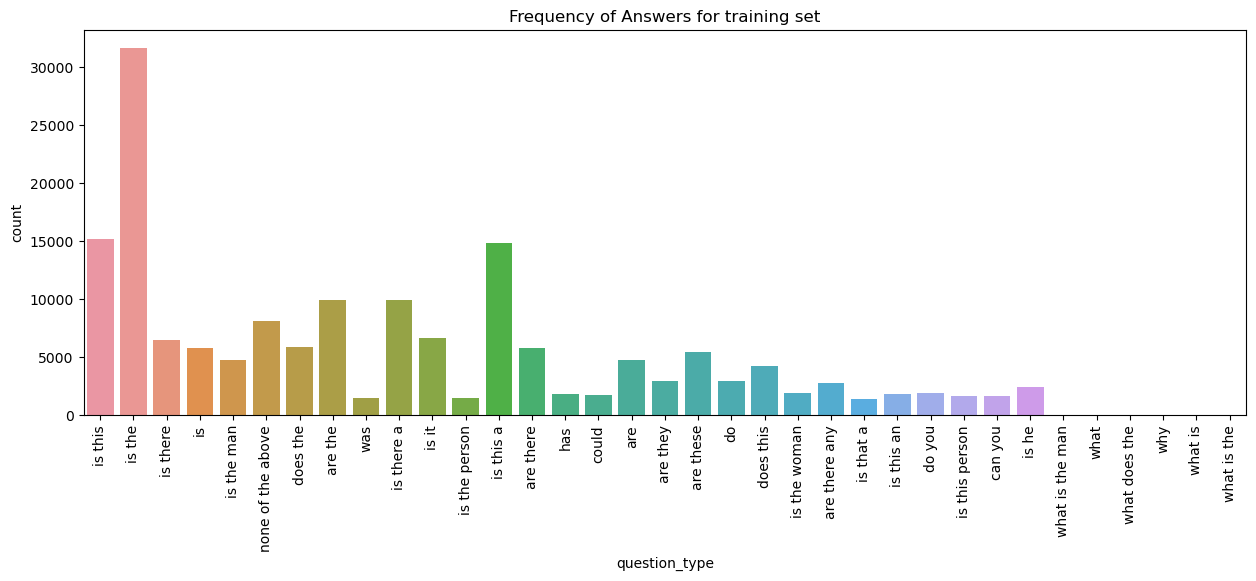

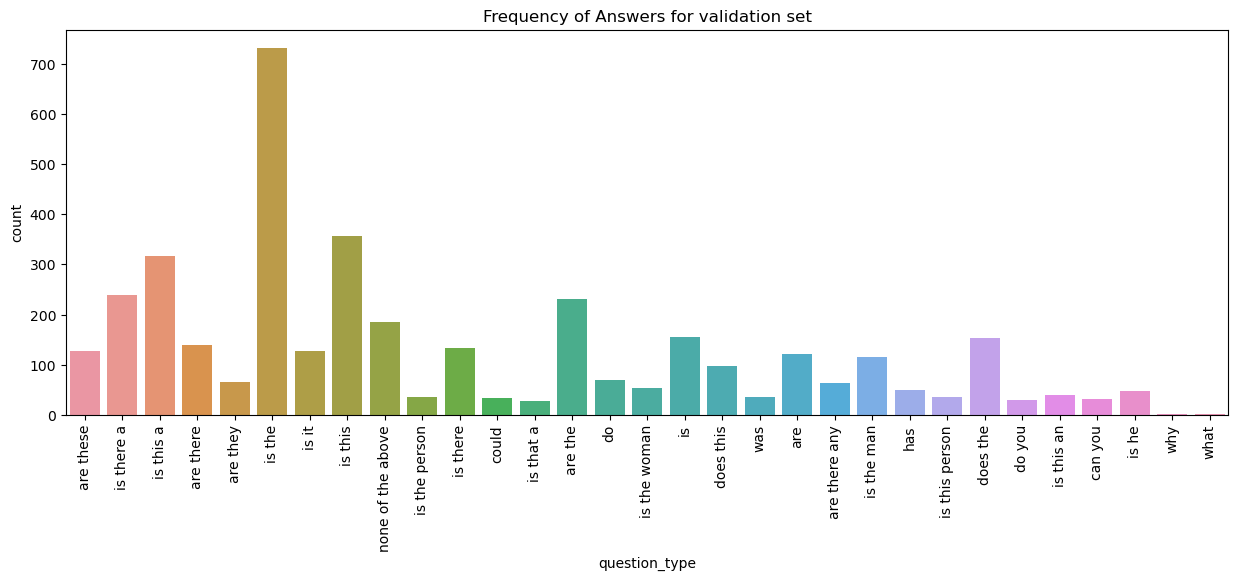

In [30]:
def plot_freq_of_ans(df, col, title):
    plt.figure(figsize=(15, 5))
    plt.xticks(rotation=90)
    plt.title(title)
    sns.countplot(x=col, data=df)
    plt.show()


plot_freq_of_ans(df_yes_no, "question_type", "Frequency of Answers for training set")
plot_freq_of_ans(df_yes_no_val, "question_type", "Frequency of Answers for validation set")

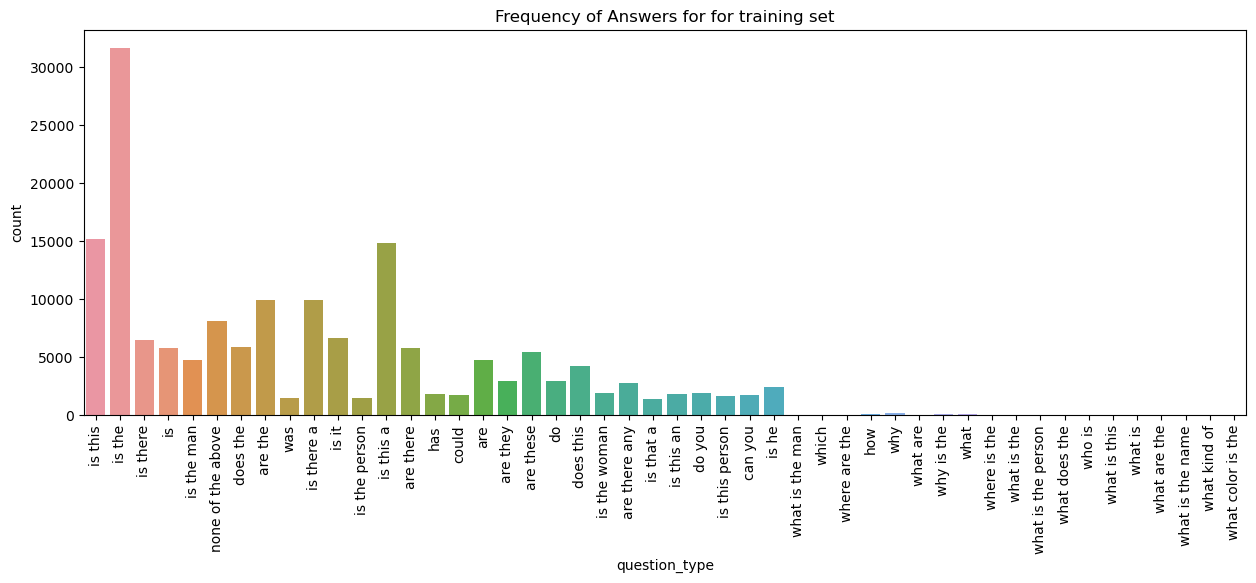

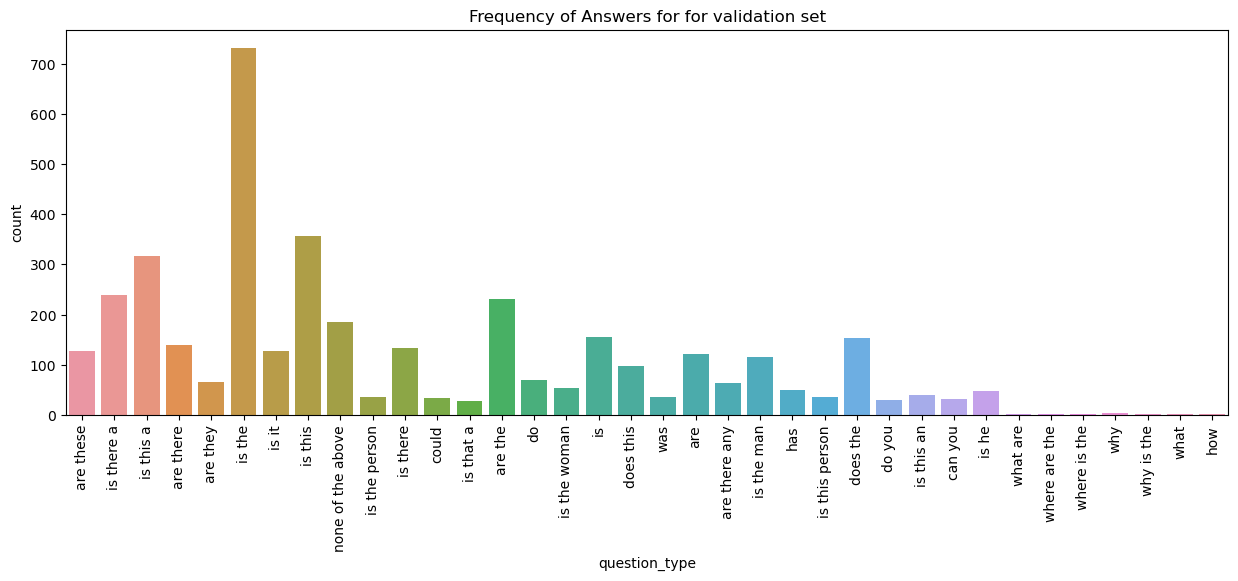

In [31]:
plot_freq_of_ans(df_train, "question_type", "Frequency of Answers for for training set")
plot_freq_of_ans(df_val, "question_type", "Frequency of Answers for for validation set")

In [32]:
df_yes_no[df_yes_no.multiple_choice_answer == 'yes'].shape[0]/df_yes_no.shape[0]

0.5070470643224392

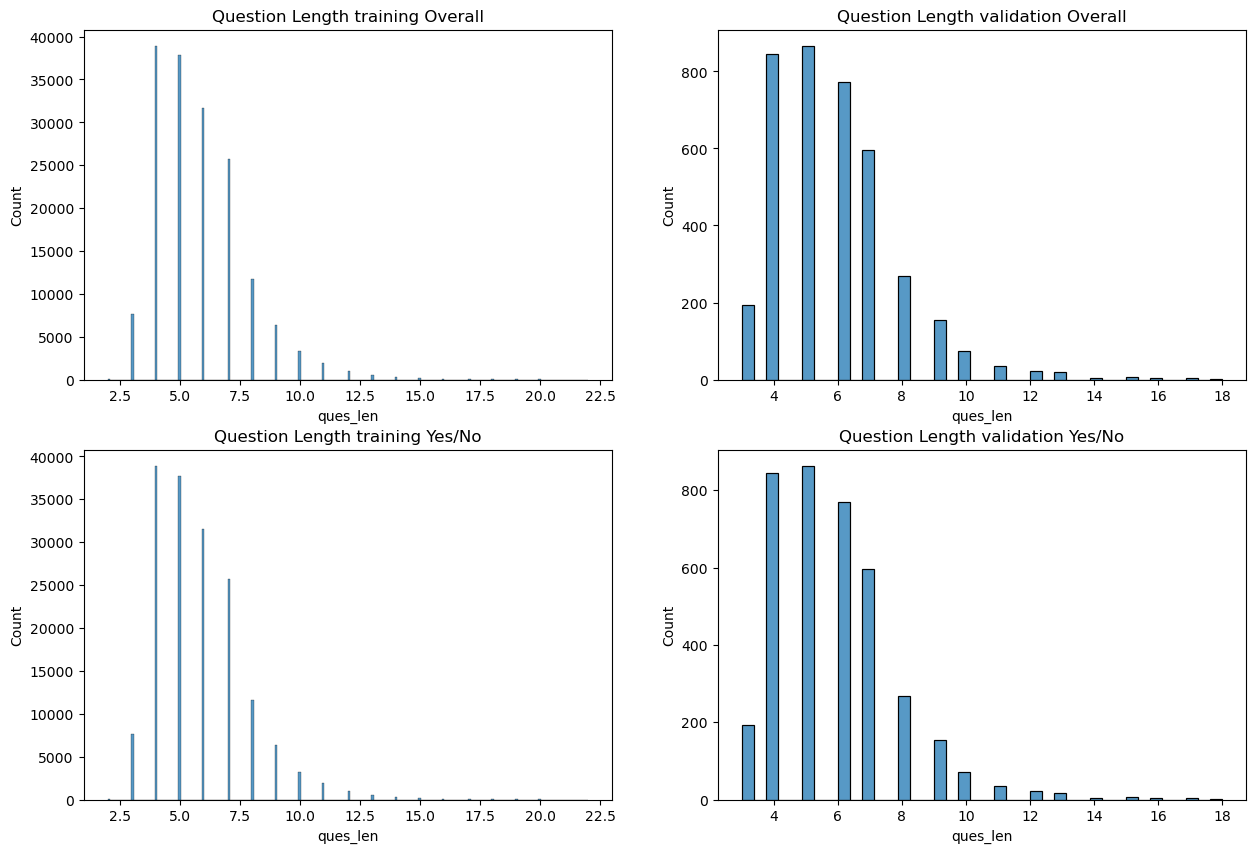

In [33]:
def ques_len(x):
    return len(x.split())

def ques_len_char(x):
    return len(x)

df_train["ques_len"] = df_train["question"].apply(ques_len)
df_val["ques_len"] = df_val["question"].apply(ques_len)
df_yes_no["ques_len"] = df_yes_no["question"].apply(ques_len)
df_yes_no_val["ques_len"] = df_yes_no_val["question"].apply(ques_len)

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax[0, 0].set_title("Question Length training Overall")
ax[0, 1].set_title("Question Length validation Overall")
ax[1, 0].set_title("Question Length training Yes/No")
ax[1, 1].set_title("Question Length validation Yes/No")
sns.histplot(df_train["ques_len"], ax=ax[0, 0])
sns.histplot(df_val["ques_len"], ax=ax[0, 1])
sns.histplot(df_yes_no["ques_len"], ax=ax[1, 0])
sns.histplot(df_yes_no_val["ques_len"], ax=ax[1, 1])
plt.show()